In [7]:
import os

os.chdir("C:/Users/MILAN/Desktop/tfpro/machine_learning_projects/scratch_detection5/XmlToTxt")
!python xmltotxt.py -c classes.txt -xml xml -out out

In [15]:

cd ..

C:\Users\MILAN\Desktop\tfpro\machine_learning_projects\scratch_detection5


C:\Users\MILAN\Desktop\tfpro\tfvenv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [12]:
pwd

'C:\\Users\\MILAN\\Desktop\\tfpro\\machine_learning_projects\\scratch_detection5\\XmlToTxt'

In [80]:
!pip install -r requirements.txt

In [14]:
import os
from random import choice
import shutil
def to_v5_directories(images_train_path,images_val_path,labels_train_path,labels_val_path, dataset_source):
    imgs =[]
    xmls =[]
    trainPath = images_train_path
    valPath =  images_val_path
    crsPath = dataset_source
    train_ratio = 0.8
    val_ratio = 0.2
    totalImgCount = len(os.listdir(crsPath))/2
    for (dirname, dirs, files) in os.walk(crsPath):
        for filename in files:
            if filename.endswith('.txt'):
                xmls.append(filename)
            else:
                imgs.append(filename)
    countForTrain = int(len(imgs)*train_ratio)
    countForVal = int(len(imgs)*val_ratio)
    trainimagePath = images_train_path
    trainlabelPath = labels_train_path
    valimagePath = images_val_path
    vallabelPath = labels_val_path
    for x in range(countForTrain):
        fileJpg = choice(imgs)
        fileXml = fileJpg[:-4] +'.txt'
        shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
        shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
        imgs.remove(fileJpg)
        xmls.remove(fileXml)
    for x in range(countForVal):
        fileJpg = choice(imgs) 
        fileXml = fileJpg[:-4] +'.txt' 
        shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
        shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
        imgs.remove(fileJpg)
        xmls.remove(fileXml)
    print("Training images are : ",countForTrain)
    print("Validation images are : ",countForVal)
#     shutil.move(crsPath, valPath)

In [15]:
os.chdir("C:/Users/MILAN/Desktop/tfpro/machine_learning_projects/scratch_detection5")
#pwd
to_v5_directories("dataset/images/train","dataset/images/val","dataset/labels/train","dataset/labels/val", "dataset/ANNOTATION")

Training images are :  800
Validation images are :  200


In [75]:
cd ..

C:\Users\MILAN\Desktop\tfpro\machine_learning_projects\scratch_detection5


In [84]:
import os#solution that was provided by chatgpt to varify that each image has a label text file or not

def check_labels(image_dir, label_dir):
    missing_labels = []
    for image_file in os.listdir(image_dir):
        if image_file.endswith('.jpg'):
            label_file = os.path.splitext(image_file)[0] + '.XML.txt'
            if not os.path.exists(os.path.join(label_dir, label_file)):
                missing_labels.append(image_file)
    return missing_labels

image_dir = "C:/Users/MILAN/Desktop/tfpro/machine_learning_projects/scratch_detection5/dataset/images/train"
label_dir = "C:/Users/MILAN/Desktop/tfpro/machine_learning_projects/scratch_detection5/dataset/labels/train"

missing_labels = check_labels(image_dir, label_dir)

if missing_labels:
    print("Missing label files for the following images:")
    for img in missing_labels:
        print(img)
else:
    print("All images have corresponding label files.")


All images have corresponding label files.


In [26]:
import os
os.chdir("C:/Users/MILAN/Desktop/tfpro/machine_learning_projects/scratch_detection5")
os.getcwd()

'C:\\Users\\MILAN\\Desktop\\tfpro\\machine_learning_projects\\scratch_detection5'

In [5]:
!python train.py --img 416 --batch 4 --epochs 300 --data dataset.yaml --weights yolov5s.pt --cache --name task30

^C


In [2]:
 !python val.py --weights runs/train/task35/weights/best.pt  --data dataset.yaml 

val: data=dataset.yaml, weights=['runs/train/task35/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v7.0-347-gd6112173 Python-3.10.7 torch-2.3.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning C:\Users\MILAN\Desktop\tfpro\machine_learning_projects\scratch_detection5\dataset\labels\val.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|##########| 200/200 [00:00<?, ?it/s]
val: Scanning C:\Users\MILAN\Desktop\tfpro\machine_learning_projects\scratch_detection5\dataset\labels\val.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|##########| 200/200 [00:00<?, ?it/s]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|   

In [17]:
cd yolov5

C:\Users\MILAN\Desktop\tfpro\machine_learning_projects\scratch_detection5\yolov5


In [10]:
#cd scratch_detection5

NameError: name 'pwd' is not defined

In [4]:
import torch
model = torch.hub.load('ultralytics/yolov5','custom',path='yolov5/runs/train/task35/weights/last.pt',force_reload=True)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [33]:
import os
img =os.path.join('dataset','lays.jpg')


In [34]:
import  time
#from datetime import time
#milsec = int(round(time.time() * 1000))
start_time = int(round(time.time() * 1000))
#print(int(round(time.time() * 1000)))
results = model(img)
end_time = int(round(time.time() * 1000))
execution_time = end_time - start_time
print(execution_time)

1199


In [35]:
results.print()

image 1/1: 1000x1000 (no detections)
Speed: 861.3ms pre-process, 337.5ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


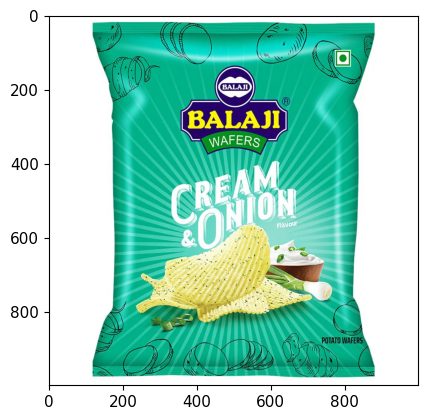

In [36]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [3]:
!python detect.py --source  C:/Users/MILAN/Desktop/tfpro/machine_learning_projects/scratch_detection5/dataset/images/train/chip.1c5cfd3c-4ce6-11ef-b68c-f889d2872452.jpg  --weights  runs/train/task35/weights/best.pt

detect: weights=['runs/train/task35/weights/best.pt'], source=C:/Users/MILAN/Desktop/tfpro/machine_learning_projects/scratch_detection5/dataset/images/train/chip.1c5cfd3c-4ce6-11ef-b68c-f889d2872452.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-347-gd6112173 Python-3.10.7 torch-2.3.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\MILAN\Desktop\tfpro\machine_learning_projects\scratch_detection5\dataset\images\train\chip.1c5cfd3c-4ce6-11ef-b68c-f889d2872452.jpg: 384x640 1 label, 1 flag, 203.3ms
Speed: 1.0ms pre-process, 203.3ms inference, 2.7

In [25]:
import os
from random import choice
import shutil
def to_v5_directories(dataset_source,destination_path):
    xmls=[]
    imgs = []

    
    crsPath = dataset_source
    dst_path = destination_path
    fileToCopy= [] 

    for (dirname,dirs,files) in os.walk(crsPath):
        for filename in files:
            if filename.endswith('.jpg'):
                imgs.append(filename)
            else:   
                xmls.append(filename)
    print(imgs)
    for x in imgs:      
        #fileXml = x[:-4] +'.XML'
        #cv2.imwrite(imgname, frame)
       # shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
       shutil.copy(os.path.join(crsPath,x), os.path.join(dst_path, x))
to_v5_directories("C:/Users/MILAN/Desktop/tfpro/machine_learning_projects/scratch_detection3/Tensorflow/workspace/images/collectedimages/spot","C:/Users/MILAN/Desktop/tfpro/machine_learning_projects/scratch_detection5/XmlToTxt/xml2")
        

['spot.bef5d119-4e90-11ef-a446-f889d2872452.jpg', 'spot.bf1ac1ca-4e90-11ef-955a-f889d2872452.jpg', 'spot.bf303821-4e90-11ef-8cfe-f889d2872452.jpg', 'spot.bf45933e-4e90-11ef-b47f-f889d2872452.jpg', 'spot.bf5c4bb7-4e90-11ef-949a-f889d2872452.jpg', 'spot.bf72a0d4-4e90-11ef-a5aa-f889d2872452.jpg', 'spot.bf8ffb85-4e90-11ef-b323-f889d2872452.jpg', 'spot.bfa7c957-4e90-11ef-9664-f889d2872452.jpg', 'spot.bfc947ca-4e90-11ef-853c-f889d2872452.jpg', 'spot.bfe05674-4e90-11ef-b24f-f889d2872452.jpg', 'spot.bff7f99e-4e90-11ef-af00-f889d2872452.jpg', 'spot.c00b4317-4e90-11ef-8187-f889d2872452.jpg', 'spot.c01c27d2-4e90-11ef-9ddd-f889d2872452.jpg', 'spot.c032f9ca-4e90-11ef-a740-f889d2872452.jpg', 'spot.c04ab869-4e90-11ef-a1e0-f889d2872452.jpg', 'spot.c0653dfe-4e90-11ef-80fe-f889d2872452.jpg', 'spot.c07bfba9-4e90-11ef-9cab-f889d2872452.jpg', 'spot.c092f239-4e90-11ef-aea2-f889d2872452.jpg', 'spot.c0add2b5-4e90-11ef-b64e-f889d2872452.jpg', 'spot.c0c4eaee-4e90-11ef-8cf8-f889d2872452.jpg', 'spot.c0e1bb6a-4e90

In [34]:
import os
from random import choice
import shutil
import lxml.etree as ET
#using lxml instead of xml preserved the comments

def to_v5_directories(dataset_source,destination_path):
    imgs =[]

    
    crsPath = dataset_source
    dst_path = destination_path
    fileToCopy= [] 
    for (dirname,dirs,files) in os.walk(dataset_source):
        for filename in files:
            if filename.endswith('.txt'):
                fileToCopy.append(filename)
    print(fileToCopy)
    for (dirname,dirs,files) in os.walk(destination_path):
        for filename in files:
            if filename.endswith('.jpg'):
                imgs.append(filename)
    print(imgs)
        
    for x in imgs:  
        fileXml = x[:-4] #+'.XML'"""
        #adding the encoding when the file is opened and written is needed to avoid a charmap error

    #tree.write('output.xml', encoding="utf8")
    # Adding the xml_declaration and method helped keep the header info at the top of the file.
        #tree.write( destination_path+'/'+fileXml+'.xml', xml_declaration=True, method='xml', encoding="utf8")
   
        
        #cv2.imwrite(imgname, frame)
       # shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
        shutil.copy(os.path.join(crsPath, fileToCopy[0]), os.path.join(destination_path, fileXml+'.txt'))
to_v5_directories("C:/Users/MILAN/Desktop/tfpro/machine_learning_projects/scratch_detection5/dataset/data_source","C:/Users/MILAN/Desktop/tfpro/machine_learning_projects/scratch_detection5/dataset/feathering")
        

['feathering.e5bf94a4-4ef5-11ef-b6f0-f889d2872452.txt', 'line.3a5d424f-4e92-11ef-8e2d-f889d2872452.txt', 'scratch.000d6a9b-4e92-11ef-936d-f889d2872452.txt', 'spot.bef5d119-4e90-11ef-a446-f889d2872452.txt']
['feathering.e5bf94a4-4ef5-11ef-b6f0-f889d2872452.jpg', 'feathering.e5d32f15-4ef5-11ef-9443-f889d2872452.jpg', 'feathering.e5dda7b3-4ef5-11ef-82c4-f889d2872452.jpg', 'feathering.e5e89a2d-4ef5-11ef-b264-f889d2872452.jpg', 'feathering.e5f2dda8-4ef5-11ef-a441-f889d2872452.jpg', 'feathering.e5fdd6c9-4ef5-11ef-b80c-f889d2872452.jpg', 'feathering.e60884de-4ef5-11ef-8b0f-f889d2872452.jpg', 'feathering.e6140a4e-4ef5-11ef-ac8d-f889d2872452.jpg', 'feathering.e61f76be-4ef5-11ef-a748-f889d2872452.jpg', 'feathering.e62b328a-4ef5-11ef-a45e-f889d2872452.jpg', 'feathering.e6355903-4ef5-11ef-b2b3-f889d2872452.jpg', 'feathering.e6429376-4ef5-11ef-8cbf-f889d2872452.jpg', 'feathering.e654ba50-4ef5-11ef-81f3-f889d2872452.jpg', 'feathering.e65fdef4-4ef5-11ef-bcbb-f889d2872452.jpg', 'feathering.e66be52f-4e

In [34]:
import os
from random import choice
import shutil
def to_v5_directories(dataset_source,destination_path):
    xmls=[]
    imgs = []

    
    crsPath = dataset_source
    dst_path = destination_path
    fileToCopy= [] 

    for (dirname,dirs,files) in os.walk(crsPath):
        for filename in files:
            if filename.endswith('.jpg'):
                imgs.append(filename)
            else:   
                xmls.append(filename)
    print(xmls)
    for x in imgs:      
        #fileXml = x[:-8] 
        #cv2.imwrite(imgname, frame)
       # shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
        shutil.copy(os.path.join(crsPath,x), os.path.join(dst_path,x))#fileXml+'.txt'))
to_v5_directories("C:/Users/MILAN/Desktop/tfpro/machine_learning_projects/scratch_detection5/dataset/ANNOTATION","C:/Users/MILAN/Desktop/tfpro/machine_learning_projects/scratch_detection5/XmlToTxt/out")
        

['barcode.5fe60fab-4b29-11ef-a426-f889d2872452.XML.txt', 'barcode.5ff63a5d-4b29-11ef-a087-f889d2872452.XML.txt', 'barcode.60078ea6-4b29-11ef-9a18-f889d2872452.XML.txt', 'barcode.60182026-4b29-11ef-967a-f889d2872452.XML.txt', 'barcode.6030aeb2-4b29-11ef-9e39-f889d2872452.XML.txt', 'barcode.6040eec3-4b29-11ef-a6db-f889d2872452.XML.txt', 'barcode.60516daf-4b29-11ef-ace1-f889d2872452.XML.txt', 'barcode.60621573-4b29-11ef-9f0a-f889d2872452.XML.txt', 'barcode.607281a2-4b29-11ef-b9e8-f889d2872452.XML.txt', 'barcode.6083d11c-4b29-11ef-ade1-f889d2872452.XML.txt', 'barcode.6099e970-4b29-11ef-9903-f889d2872452.XML.txt', 'barcode.60ae7dea-4b29-11ef-8218-f889d2872452.XML.txt', 'barcode.60c1ffbe-4b29-11ef-8ed5-f889d2872452.XML.txt', 'barcode.60ddf167-4b29-11ef-b45c-f889d2872452.XML.txt', 'barcode.60f10274-4b29-11ef-8d09-f889d2872452.XML.txt', 'barcode.6103a019-4b29-11ef-b00e-f889d2872452.XML.txt', 'barcode.611e0692-4b29-11ef-9e1a-f889d2872452.XML.txt', 'barcode.6130dfeb-4b29-11ef-b13b-f889d2872452.X

In [ ]:
import os
from random import choice
import shutil
def to_v5_directories(dataset_source,destination_path):
    imgs =[]

    
    crsPath = dataset_source
    dst_path = destination_path
    fileToCopy= [] 
    for (dirname,dirs,files) in os.walk(dataset_source):
        for filename in files:
            fileToCopy.append(filename)
    print(fileToCopy)
    for (dirname,dirs,files) in os.walk(dst_path):
        for filename in files:
            imgs.append(filename)
    print(imgs)
    for x in imgs:      
        fileXml = x[:-4] 
        #cv2.imwrite(imgname, frame)
       # shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
        shutil.copy(os.path.join(crsPath, fileToCopy[0]), os.path.join(destination_path, fileXml))
to_v5_directories("Tensorflow/workspace/images/collectedimages/data_source","Tensorflow/workspace/images/collectedimages/barcode")
        